In [ ]:
import keras
keras.__version__


#MNIST sample digits

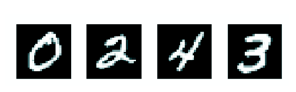

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [13]:
train_images.shape

(60000, 784)

In [14]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2598 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1036 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0680 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0497 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0376 - accuracy: 0.9887


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0663 - accuracy: 0.9786


In [18]:
print('test_acc:', test_acc)

test_acc: 0.978600025177002
